# **FINAL PROJECT DATA ANALYSIS**

`by: Novia Anggita Aprilianti (DS30)`

## Data Overview

**Scenario**

A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

**Goal**

Evaluate A/B testing results and decide which marketing strategy works the best.

**Columns**

```
MarketID: unique identifier for market
MarketSize: size of market area by sales
LocationID: unique identifier for store location
AgeOfStore: age of store in years
Promotion: one of three promotions that were tested
week: one of four weeks when the promotions were run
SalesInThousands: sales amount for a specific LocationID, Promotion, and week
```



**Data sources and references**: [here](https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test/data)

## Import Library, Loading and Reading Data

In [179]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [180]:
# Loading the dataset
df_per_week = pd.read_csv('WA_Marketing-Campaign.csv', sep=',')
df_per_week.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [181]:
df_per_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [182]:
df_per_week = df_per_week.rename(columns={'MarketID': 'Market ID',
                    'MarketSize': 'Market Size',
                    'LocationID': 'Location ID',
                    'AgeOfStore': 'Age of Store',
                    'week': 'Week',
                    'SalesInThousands': 'Sales (Thousands)'})
df_per_week.head()

,Market ID,Market Size,Location ID,Age of Store,Promotion,Week,Sales (Thousands)
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


## Data Preprocessing

In [183]:
# Checking missing value
print('Total NaN value for each variable')
for column in df_per_week.columns:
  print(f'{column:20} {df_per_week[column].isna().sum()}')

Total NaN value for each variable
Market ID            0
Market Size          0
Location ID          0
Age of Store         0
Promotion            0
Week                 0
Sales (Thousands)    0


In [184]:
# Checking duplicate data
duplicate_check = len(df_per_week.drop_duplicates()) / len(df_per_week)
if duplicate_check == 1:
  print('There are no duplicate data.')
else: print(f'There are {len(df_per_week.drop_duplicates())} duplicate data')

There are no duplicate data.


In [185]:
# Change data type (Market ID, Location ID, Promotion, Week: int to object)
df_per_week['Market ID'] = df_per_week['Market ID'].astype(str)
df_per_week['Location ID'] = df_per_week['Location ID'].astype(str)
df_per_week['Promotion'] = df_per_week['Promotion'].astype(str)
df_per_week['Week'] = df_per_week['Week'].astype(str)
df_per_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Market ID          548 non-null    object 
 1   Market Size        548 non-null    object 
 2   Location ID        548 non-null    object 
 3   Age of Store       548 non-null    int64  
 4   Promotion          548 non-null    object 
 5   Week               548 non-null    object 
 6   Sales (Thousands)  548 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 30.1+ KB


In [186]:
# Summarizing weekly sales data
df = df_per_week.copy()
df = df.groupby(['Market ID', 'Market Size', 'Location ID', 'Age of Store', 'Promotion'])['Sales (Thousands)'].sum().reset_index()
df.head()

,Market ID,Market Size,Location ID,Age of Store,Promotion,Sales (Thousands)
0,1,Medium,1,4,3,137.68
1,1,Medium,10,5,2,122.66
2,1,Medium,11,5,3,145.45
3,1,Medium,12,12,1,151.14
4,1,Medium,13,12,1,169.49


In [187]:
# Let's see the data distribution to detect outlier

def distribution_check(data, variable):
  fig, axes = plt.subplots(nrows=len(variable), ncols=3, figsize=(16,4*len(variable)))
  plt.style.use('dark_background')

  if len(variable) == 1:
    for i in range(len(variable)):
      # Histogram
      sns.histplot(data[variable[i]], bins=30, kde=True, ax=axes[0])
      axes[0].set_title(f'Histogram of {variable[i]}')
      axes[0].grid(axis='y', color='grey', linestyle='--', alpha=0.5)

      # Plot Q-Q
      stats.probplot(data[variable[i]], dist='norm', plot=axes[1])
      axes[1].set_title(f'Q-Q Plot of {variable[i]}')
      axes[1].grid(axis='y', color='grey', linestyle='--', alpha=0.5)

      # Box plot
      sns.boxplot(data[variable[i]], orient='h', ax=axes[2])
      axes[2].set_title(f'Box Plot of {variable[i]}')
      axes[2].grid(axis='y', color='grey', linestyle='--', alpha=0.5)

  else:
    for i in range(len(variable)):
      # Histogram
      sns.histplot(data[variable[i]], bins=30, kde=True, ax=axes[i, 0])
      axes[i, 0].set_title(f'Histogram of {variable[i]}')
      axes[i, 0].grid(axis='y', color='grey', linestyle='--', alpha=0.5)

      # Plot Q-Q
      stats.probplot(data[variable[i]], dist='norm', plot=axes[i, 1])
      axes[i, 1].set_title(f'Q-Q Plot of {variable[i]}')
      axes[i, 1].grid(axis='y', color='grey', linestyle='--', alpha=0.5)

      # Box plot
      sns.boxplot(data[variable[i]], orient='h', ax=axes[i, 2])
      axes[i, 2].set_title(f'Box Plot of {variable[i]}')
      axes[i, 2].grid(axis='y', color='grey', linestyle='--', alpha=0.5)

  plt.tight_layout()
  plt.show()

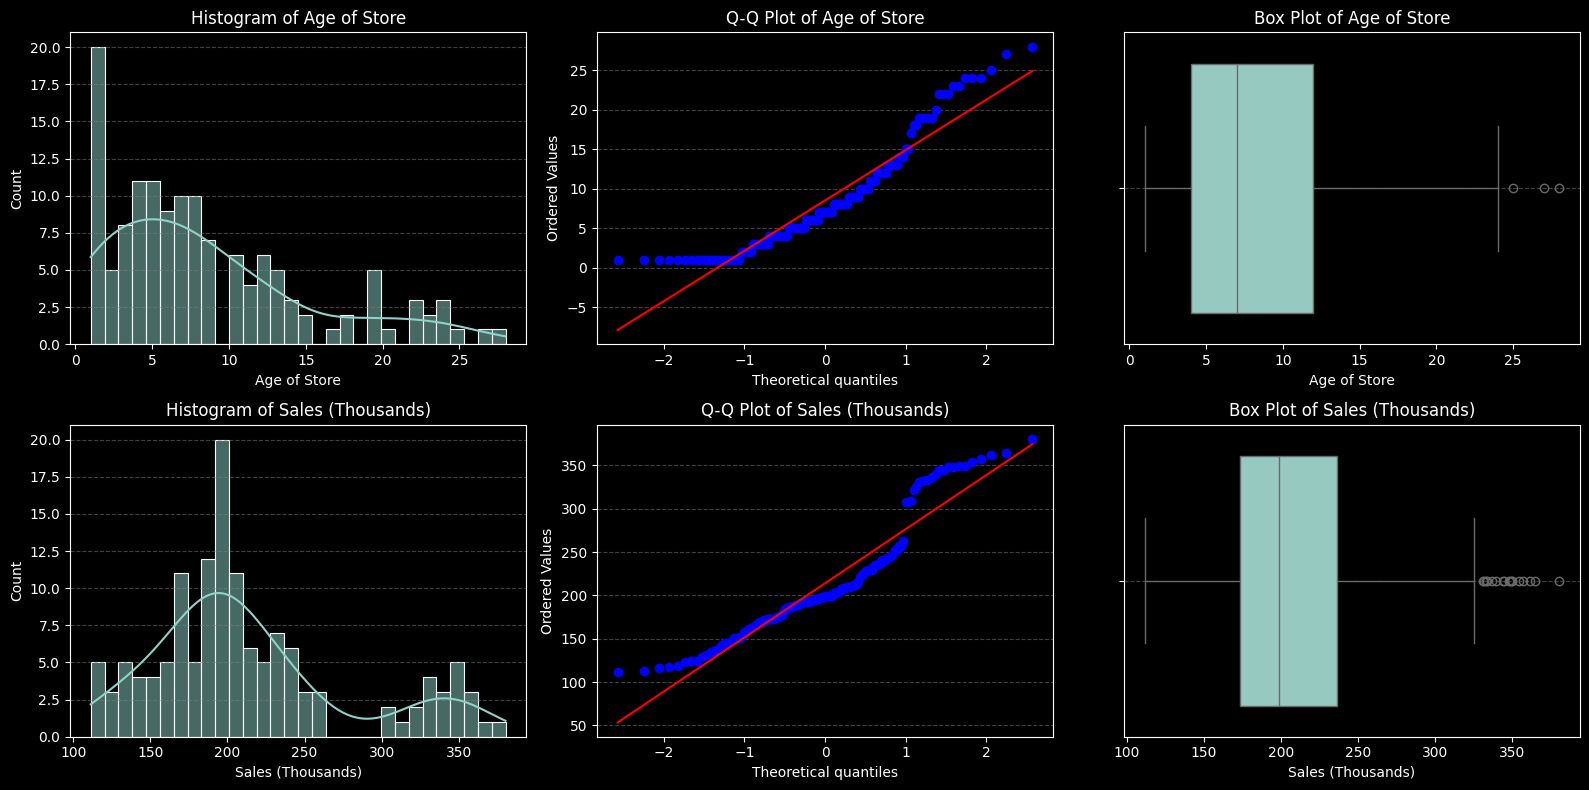

In [188]:
distribution_check(df, df.select_dtypes(include=np.number).columns)

## Data Understanding and EDA

In [189]:
# Counting unique values ​​in each column
df.nunique().to_frame().reset_index().rename(columns={'index': 'Variable', 0: 'Total Unique Value'})

,Variable,Total Unique Value
0,Market ID,10
1,Market Size,3
2,Location ID,137
3,Age of Store,25
4,Promotion,3
5,Sales (Thousands),137


**EDA Questions:**
1. What is the average sales over the last 4 weeks at each location?
2. How are the sales performances for each market size? Is market size positively correlated with sales performance?
3. What is the relationship between store age and sales performance? Is store age positively correlated with sales performance?
4. What are the sales trends for each type of promotion?
5. Which type of promotion achieved the highest sales figures? Compare also in each market size.
6. Which locations have total sales above the average? Which type of promotion has the greatest impact on boosting sales at these locations?

**Let's answer it**

### Question 1
What is the average sales over the last 4 weeks at each location?

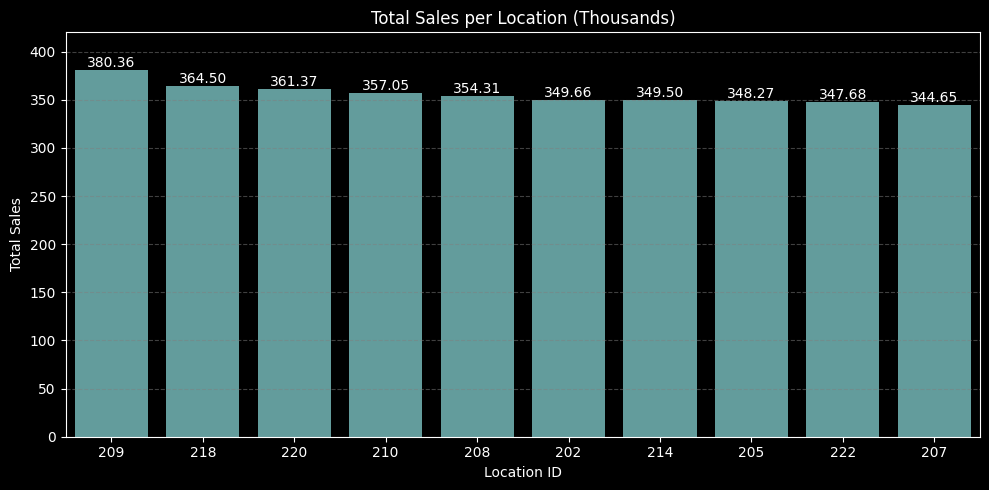

In [190]:
# Table of total sales per store
sales_per_store = df.groupby('Location ID')['Sales (Thousands)'].sum().reset_index().sort_values(by='Sales (Thousands)', ascending=False)

# Graph of total sales per location (top 10)
fig, axes = plt.subplots(figsize=(10,5))
plt.style.use('dark_background')
sns.barplot(sales_per_store.head(10), x='Location ID', y='Sales (Thousands)', color='#5AA5A5')
plt.title('Total Sales per Location (Thousands)')
plt.ylim(0, 420)
plt.ylabel('Total Sales')
plt.grid(axis='y', color='grey', linestyle='--', alpha=0.5)

for i in axes.containers:
    axes.bar_label(i, fmt='%.2f')

plt.tight_layout()
plt.show()

### Question 2
How are the sales performances for each market size? Is market size positively correlated with sales performance?

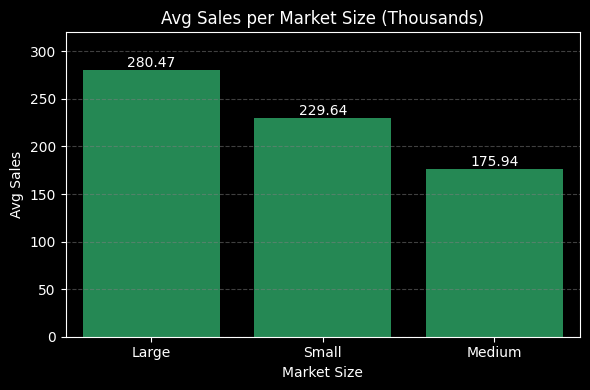

In [191]:
# Table of total sales per store market size
sales_per_size = df.groupby('Market Size')['Sales (Thousands)'].mean().rename('Avg Sales (Thousands)').reset_index().sort_values(by='Avg Sales (Thousands)', ascending=False)

# Graph of total sales per market size
fig, axes = plt.subplots(figsize=(6,4))
plt.style.use('dark_background')
sns.barplot(sales_per_size, x='Market Size', y='Avg Sales (Thousands)', color='#149853')
plt.title('Avg Sales per Market Size (Thousands)')
plt.ylim(0, 320)
plt.ylabel('Avg Sales')
plt.grid(axis='y', color='grey', linestyle='--', alpha=0.5)

for i in axes.containers:
    axes.bar_label(i, fmt='%.2f')

plt.tight_layout()
plt.show()

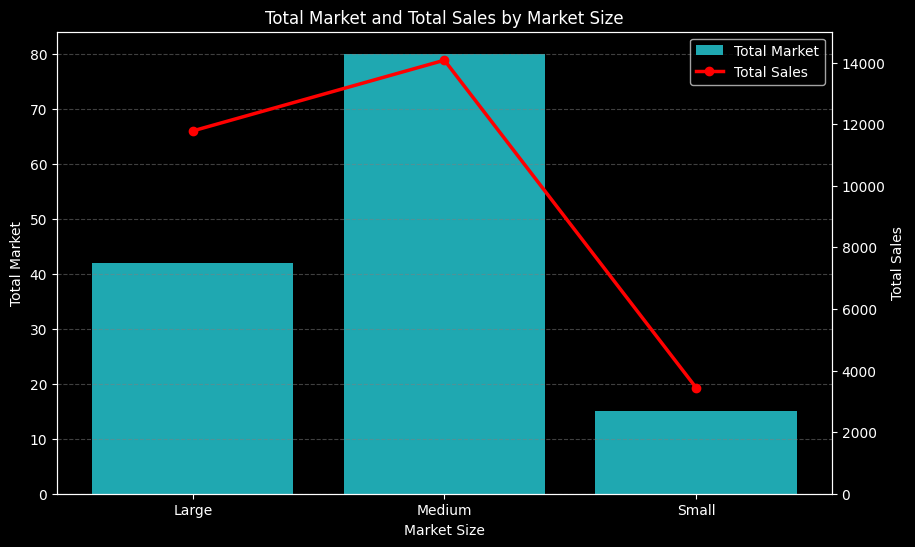

In [192]:
df_grouped = df.groupby('Market Size')['Sales (Thousands)'].agg(['count', 'sum']).rename(columns={'count': 'Total Market', 'sum': 'Total Sales'}).reset_index()

# Membuat bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(df_grouped['Market Size'], df_grouped['Total Market'], color='#1FA8B1', label='Total Market')
ax1.set_xlabel('Market Size')
ax1.set_ylabel('Total Market')
ax1.tick_params(axis='y')
ax1.grid(axis='y', color='grey', linestyle='--', alpha=0.5)
ax1.set_title('Total Market and Total Sales by Market Size')

# Membuat line chart
ax2 = ax1.twinx()  # Membuat sumbu y kedua yang berbagi sumbu x
ax2.plot(df_grouped['Market Size'], df_grouped['Total Sales'], color='red', marker='o', linestyle='-', linewidth=2.5 , label='Total Sales')
ax2.set_ylabel('Total Sales')
ax2.tick_params(axis='y')
ax2.set_ylim(0,15000)

# Menampilkan legend
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.88))

# Menampilkan plot
plt.show()

### Question 3
What is the relationship between store age and sales performance? Is store age positively correlated with sales performance?

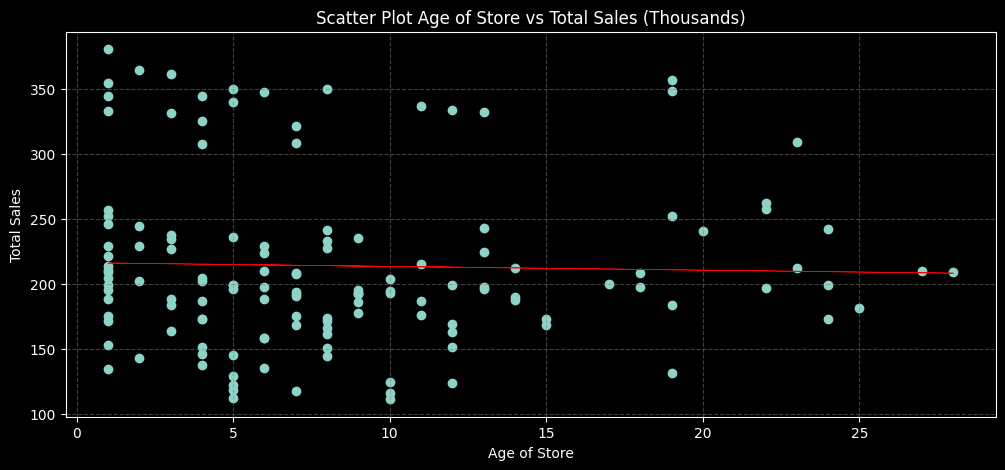

In [193]:
# Scatter plot age vs total sales
plt.subplots(figsize=(12,5))
plt.style.use('dark_background')
plt.scatter(df['Age of Store'], df['Sales (Thousands)'])
plt.title('Scatter Plot Age of Store vs Total Sales (Thousands)')
plt.xlabel('Age of Store')
plt.ylabel('Total Sales')
plt.grid(color='gray', linestyle='--', alpha=0.5)

# Trend
z = np.polyfit(df['Age of Store'], df['Sales (Thousands)'], 1)
p = np.poly1d(z)
plt.plot(df['Age of Store'], p(df['Age of Store']), "r-", linewidth=0.5)

plt.show()

### Question 4
What are the sales trends for each type of promotion?

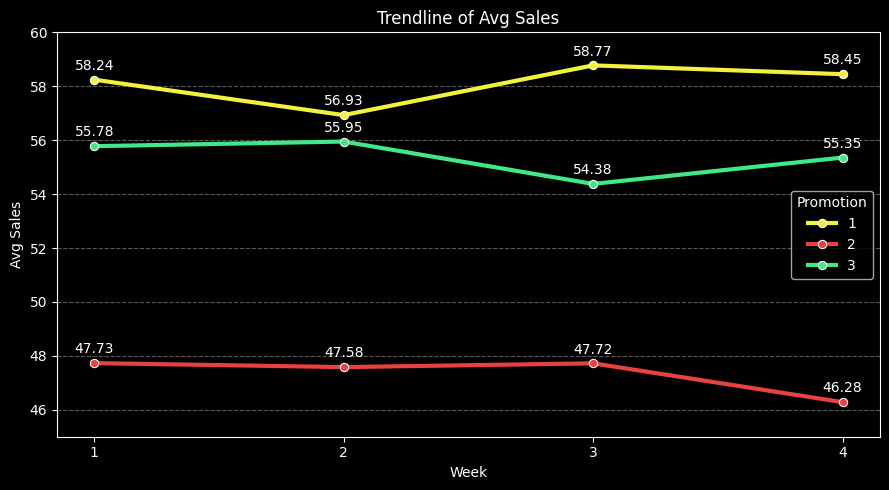

In [194]:
# Sales trends by type of promotion
sales_per_promo_week = df_per_week.groupby(['Promotion', 'Week'])['Sales (Thousands)'].mean().reset_index()

fig, axes = plt.subplots(figsize=(9,5))
plt.style.use('dark_background')

sns.lineplot(data=sales_per_promo_week, x='Week', y='Sales (Thousands)',
             hue='Promotion',
             linewidth=3,
             marker='o',
             palette=['#F2F23D', '#E94040', '#40E986'])
plt.title('Trendline of Avg Sales')
plt.ylabel("Avg Sales")
plt.ylim(45, 60)
plt.grid(axis='y', color='grey', linestyle='--', alpha=0.7)

for x, y in zip(sales_per_promo_week['Week'], sales_per_promo_week['Sales (Thousands)']):
    plt.annotate(text=f'{y:.2f}',
                  xy=(x, y),
                  textcoords="offset points",
                  xytext=(0, 7),
                  ha='center',
                  color='white')

plt.tight_layout()
plt.show()

### Question 5
Which type of promotion achieved the highest sales figures? Compare also in each market size.

In [195]:
# Total sales by promotion type
sales_by_promo = df.groupby('Promotion')['Sales (Thousands)'].sum().reset_index().sort_values(by='Sales (Thousands)', ascending=False)
sales_by_promo

# Total sales by promotion type for each market size
sales_by_promo_size = (
            pd.pivot_table(df, index='Promotion', columns='Market Size', values='Sales (Thousands)', aggfunc='sum', margins=True)
              .sort_values(by='All', ascending=False)
              .rename(columns={'All': 'Grand Total'})
              .drop('All')
          )
sales_by_promo_size

Market Size,Large,Medium,Small,Grand Total
Promotion,,,,
3,3705.79,5274.39,1428.34,10408.52
1,4213.21,4576.57,1203.25,9993.03
2,3860.61,4224.35,812.97,8897.93


<ipython-input-196-aeef43fb3f1d>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom_values[i] + value / 2,  # Center of the bar segment


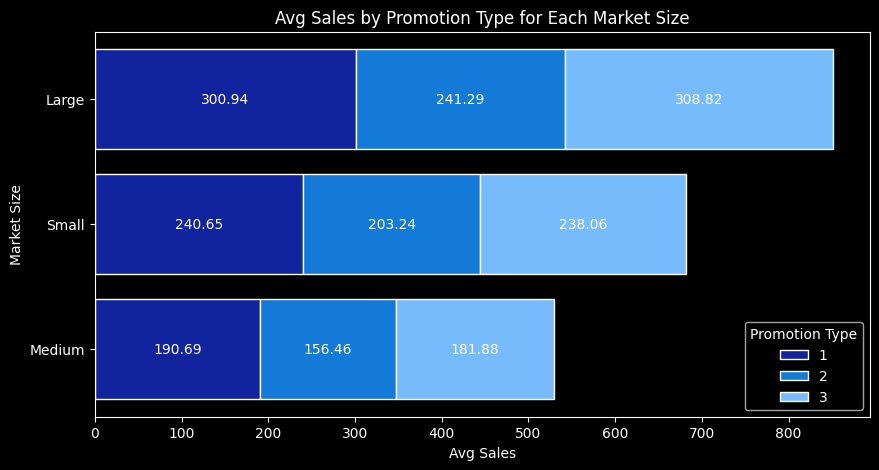

In [196]:
multiple_bar = df.groupby(['Market Size', 'Promotion'])['Sales (Thousands)'].mean().reset_index(name='Avg Sales').sort_values(by='Avg Sales', ascending=False)
stacked_data = pd.pivot_table(multiple_bar,
                             index='Market Size',
                             columns='Promotion',
                             values='Avg Sales',
                             margins=True,
                             aggfunc='mean')
stacked_data = stacked_data.drop(index='All').sort_values(by='All').drop(columns='All')

fig, ax = plt.subplots(figsize=(10, 5))

# Define positions for bars
bar_positions = np.arange(len(stacked_data.index))

# Stacked bar plot
bottom_values = np.zeros(len(stacked_data.index))  # Track the bottom position for stacking
colors = {'1': '#12239E', '2': '#147AD8', '3': '#76BCFD'}

for label in stacked_data.columns:
    ax.barh(
        bar_positions,
        stacked_data[label],
        color=colors[label],
        edgecolor='white',
        label=label,
        left=bottom_values,
    )
    for i, value in enumerate(stacked_data[label]):
        if value > 0:  # Only add labels for non-zero values
            ax.text(
                bottom_values[i] + value / 2,  # Center of the bar segment
                i,  # y-position (bar index)
                f'{value:.2f}',
                ha='center',
                va='center',
                fontsize=10,
                color='white',
            )
    bottom_values += stacked_data[label]   # Update bottom_values for next stack

ax.set_yticks(bar_positions)
ax.set_yticklabels(stacked_data.index)
ax.set_title('Avg Sales by Promotion Type for Each Market Size')
ax.set_xlabel('Avg Sales')
ax.set_ylabel('Market Size')
ax.legend(title='Promotion Type')

plt.show()

### Question 6
Which locations have total sales above the average? Which type of promotion has the greatest impact on boosting sales at these locations?

Avg Sales (all): 213.86
The number of locations with total sales above average: 48


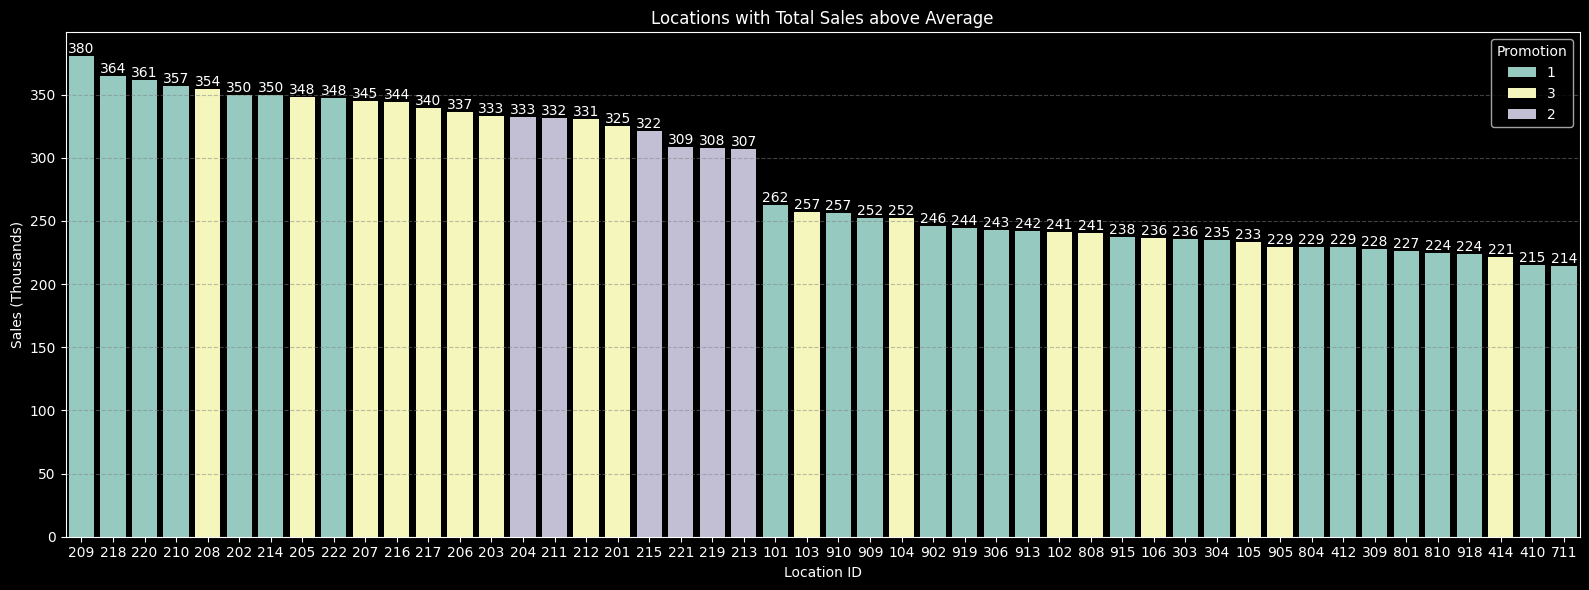

In [197]:
multiple_bar = df.groupby(['Location ID', 'Promotion'])['Sales (Thousands)'].mean().reset_index().sort_values(by='Sales (Thousands)', ascending=False)
avg_sales_all = multiple_bar['Sales (Thousands)'].mean()
print(f'Avg Sales (all): {avg_sales_all:.2f}')

multiple_bar = multiple_bar[multiple_bar['Sales (Thousands)'] > multiple_bar['Sales (Thousands)'].mean()]
print(f'The number of locations with total sales above average: {len(multiple_bar)}')

fig, axes = plt.subplots(figsize=(16,6))
plt.style.use('dark_background')
ax = sns.barplot(multiple_bar, x='Location ID', y='Sales (Thousands)', hue='Promotion')
plt.title('Locations with Total Sales above Average')
plt.grid(axis='y', color='grey', linestyle='--', alpha=0.5)

for i in axes.containers:
    axes.bar_label(i, fmt='%.0f')

plt.tight_layout()
plt.show()

## Assumption Test

### Normality Test

In [198]:
# Checking normality using statistical tests
from scipy.stats import shapiro

print('''------------------------------------ HYPOTHESIS ------------------------------------
H0: The data follows a normal distribution
H1: The data doesn't follow a normal distribution
''')

alpha = 0.05
print(f'Significance level (alpha): {alpha}')
print('')
print('-------------------------------------- RESULTS -------------------------------------')
for group in df['Promotion'].unique():
  _, p_value = shapiro(df['Sales (Thousands)'][df['Promotion'] == group])
  print(f'Shapiro-wilk test for group {group}: p-value = {p_value}')
  if p_value < alpha: print(f"Group {group} data doesn't follow a normal distribution")
  else:  print(f"Group {group} data follow a normal distribution")
  print('')

------------------------------------ HYPOTHESIS ------------------------------------
H0: The data follows a normal distribution
H1: The data doesn't follow a normal distribution

Significance level (alpha): 0.05

-------------------------------------- RESULTS -------------------------------------
Shapiro-wilk test for group 3: p-value = 0.00013465662878407012
Group 3 data doesn't follow a normal distribution

Shapiro-wilk test for group 2: p-value = 2.3924814097271858e-05
Group 2 data doesn't follow a normal distribution

Shapiro-wilk test for group 1: p-value = 0.0001570588078714773
Group 1 data doesn't follow a normal distribution



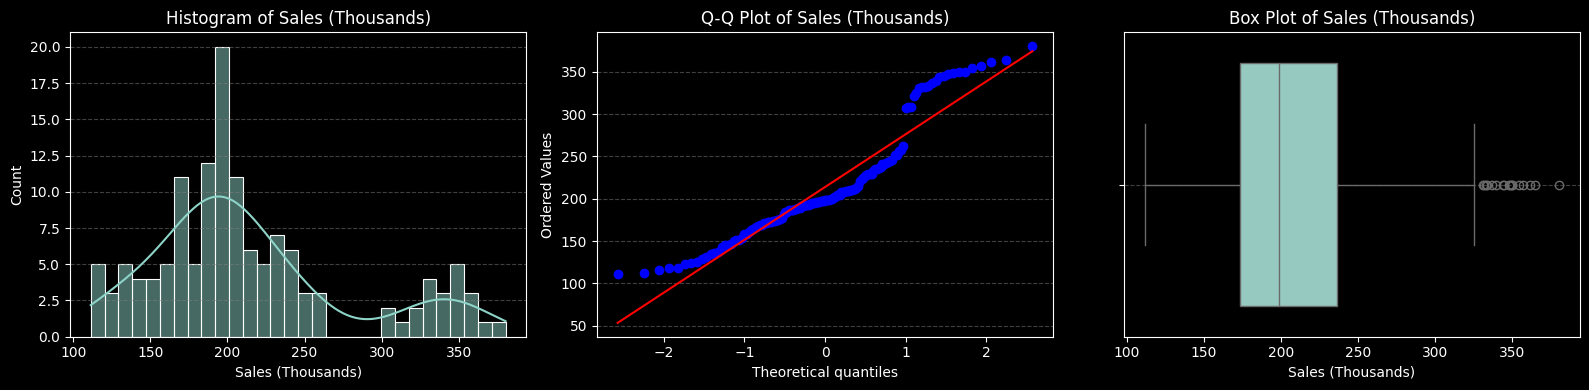

In [199]:
distribution_check(df, ['Sales (Thousands)'])

In [200]:
# Bimodal Distribution Check (1)

# Bimodality Coefficient - BC
from scipy.stats import kurtosis, skew

gamma = skew(df['Sales (Thousands)'])
kappa = kurtosis(df['Sales (Thousands)'], fisher=True)  # Fisher=True for excess kurtosis
n = len(df['Sales (Thousands)'])
BC = (gamma**2 + 1) / (kappa + (3 * (n - 1)**2) / ((n - 2) * (n - 3)))
print("Bimodality Coefficient:", BC)
if BC > 0.555: print('The distribution can be categorized as bimodal')
else: print('The distribution can be categorized as unimodal')

Bimodality Coefficient: 0.571633185838776
The distribution can be categorized as bimodal


Mode Total in the Distribution:  2
The distribution can be categorized as bimodal
Found Mode Values: [196 343]


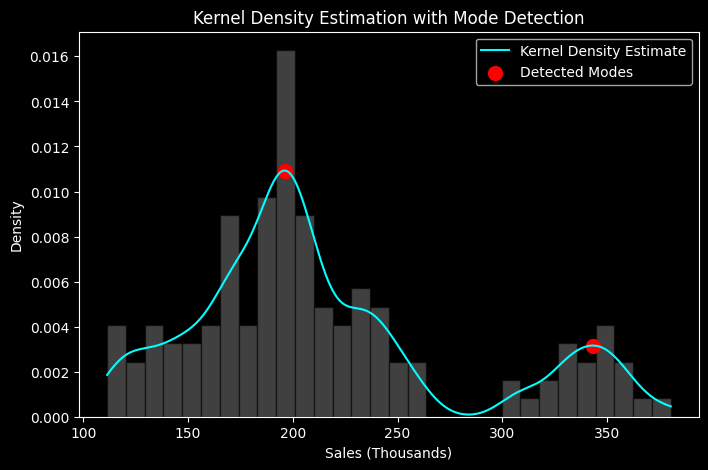

In [201]:
# Bimodal Distribution Check (2)

# Silverman’s Test (KDE + Mode Detection)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
from scipy.signal import argrelextrema

# Grid search to find the optimal bandwidth
bandwidths = np.logspace(-1, 1, 20)
grid = GridSearchCV(KernelDensity(), {'bandwidth': bandwidths}, cv=5)
grid.fit(df['Sales (Thousands)'].values.reshape(-1, 1))

# Use KDE with the optimal bandwidth
kde = KernelDensity(bandwidth=grid.best_params_['bandwidth'])
kde.fit(df['Sales (Thousands)'].values.reshape(-1, 1))

# Take samples for distribution estimation
x_grid = np.linspace(min(df['Sales (Thousands)']), max(df['Sales (Thousands)']), 1000).reshape(-1, 1)
log_dens = kde.score_samples(x_grid)

# Count the number of peaks by detecting sign changes in the first derivative
peaks = argrelextrema(np.exp(log_dens), np.greater)[0]
print("Mode Total in the Distribution: ", len(peaks))
if len(peaks) > 1: print('The distribution can be categorized as bimodal')
else: print('The distribution can be categorized as unimodal')

# Take the mode value from the grid
modes = x_grid[peaks]
print("Found Mode Values:", modes.flatten().astype(int))

# Plot the histogram and KDE with the mode peaks marked
plt.figure(figsize=(8, 5))
plt.hist(df['Sales (Thousands)'], bins=30, density=True, alpha=0.5, color='gray', edgecolor='black')
plt.plot(x_grid, np.exp(log_dens), color='cyan', label="Kernel Density Estimate")
plt.scatter(modes, np.exp(log_dens)[peaks], color='red', s=100, label="Detected Modes")  # Mark the mode
plt.xlabel("Sales (Thousands)")
plt.ylabel("Density")
plt.legend()
plt.title("Kernel Density Estimation with Mode Detection")
plt.show()

In [202]:
# Separating data because it's bimodal distributed
# We will use the histogram above to estimate the threshold between two groups of data
# Based on the histogram, the threshold of the two groups is at 275

df_1 = df[df['Sales (Thousands)'] < 275]
df_2 = df[df['Sales (Thousands)'] >= 275]

print(f'Data (df_1) shape: {df_1.shape}')
print(f'Data (df_2) shape: {df_2.shape}')

print('------------------------------------------------')
print(f'Number of data (df_1) per promotion type:')
print(df_1.groupby('Promotion')['Promotion'].count())

print('------------------------------------------------')
print(f'Number of data (df_2) per promotion type:')
print(df_2.groupby('Promotion')['Promotion'].count())

Data (df_1) shape: (115, 6)
Data (df_2) shape: (22, 6)
------------------------------------------------
Number of data (df_1) per promotion type:
Promotion
1    36
2    41
3    38
Name: Promotion, dtype: int64
------------------------------------------------
Number of data (df_2) per promotion type:
Promotion
1    7
2    6
3    9
Name: Promotion, dtype: int64


In [203]:
# Normality check: df_1
print('-------------------------------------------------------------------------------------')
print('                          NORMALITY CHECK: DF_1')
print('-------------------------------------------------------------------------------------')
print('''HYPOTHESIS
H0: The data follows a normal distribution
H1: The data doesn't follow a normal distribution
''')

alpha = 0.05
print(f'Significance level (alpha): {alpha}')
print('')
print('RESULTS')
for group in df_1['Promotion'].unique():
  _, p_value = shapiro(df_1['Sales (Thousands)'][df_1['Promotion'] == group])
  print(f'- Shapiro-wilk test for group {group}: p-value = {p_value}')
  if p_value < alpha: print(f"  Group {group} data doesn't follow a normal distribution")
  else:  print(f"  Group {group} data follow a normal distribution")

print('')
print('')

# Normality check: df_2
print('-------------------------------------------------------------------------------------')
print('                          NORMALITY CHECK: DF_2')
print('-------------------------------------------------------------------------------------')
print('''HYPOTHESIS
H0: The data follows a normal distribution
H1: The data doesn't follow a normal distribution
''')

alpha = 0.05
print(f'Significance level (alpha): {alpha}')
print('')
print('RESULTS')
for group in df_2['Promotion'].unique():
  _, p_value = shapiro(df_2['Sales (Thousands)'][df_2['Promotion'] == group])
  print(f'- Shapiro-wilk test for group {group}: p-value = {p_value}')
  if p_value < alpha: print(f"  Group {group} data doesn't follow a normal distribution")
  else:  print(f"  Group {group} data follow a normal distribution")

-------------------------------------------------------------------------------------
                          NORMALITY CHECK: DF_1
-------------------------------------------------------------------------------------
HYPOTHESIS
H0: The data follows a normal distribution
H1: The data doesn't follow a normal distribution

Significance level (alpha): 0.05

RESULTS
- Shapiro-wilk test for group 3: p-value = 0.397674367391413
  Group 3 data follow a normal distribution
- Shapiro-wilk test for group 2: p-value = 0.0006311522548450902
  Group 2 data doesn't follow a normal distribution
- Shapiro-wilk test for group 1: p-value = 0.04938793170745166
  Group 1 data doesn't follow a normal distribution


-------------------------------------------------------------------------------------
                          NORMALITY CHECK: DF_2
-------------------------------------------------------------------------------------
HYPOTHESIS 
H0: The data follows a normal distribution
H1: The data doesn'

### Homogeneity Test

In [204]:
from scipy.stats import levene

print('-------------------------------------------------------------------------------------')
print('                          HOMOGEINITY CHECK: DF_2')
print('-------------------------------------------------------------------------------------')
print('''HYPOTHESIS
H0: The data are homogeneous
H1: The data aren’t homogeneous
''')
alpha = 0.05
print(f'Significance level (alpha): {alpha}')
print('')
print('RESULTS')
statistic, p_value = levene(*[df_1['Sales (Thousands)'][df_1['Promotion'] == group] for group in df_1['Promotion'].unique()])
print(f'Levene Test df_1: p-value = {p_value}')
if p_value < alpha: print(f"The data aren’t homogeneous")
else:  print(f"The data are homogeneous")

print('')
print('')

print('-------------------------------------------------------------------------------------')
print('                          HOMOGEINITY CHECK: DF_2')
print('-------------------------------------------------------------------------------------')
print('''HYPOTHESIS
H0: The data are homogeneous
H1: The data aren’t homogeneous
''')
alpha = 0.05
print(f'Significance level (alpha): {alpha}')
print('')
print('RESULTS')
statistic, p_value = levene(*[df_2['Sales (Thousands)'][df_2['Promotion'] == group] for group in df_2['Promotion'].unique()])
print(f'Levene Test df_2: p-value = {p_value}')
if p_value < alpha: print(f"The data aren’t homogeneous")
else:  print(f"The data are homogeneous")

-------------------------------------------------------------------------------------
                          HOMOGEINITY CHECK: DF_2
-------------------------------------------------------------------------------------
HYPOTHESIS
H0: The data are homogeneous
H1: The data aren’t homogeneous

Significance level (alpha): 0.05

RESULTS
Levene Test df_1: p-value = 0.7995827322834481
The data are homogeneous


-------------------------------------------------------------------------------------
                          HOMOGEINITY CHECK: DF_2
-------------------------------------------------------------------------------------
HYPOTHESIS
H0: The data are homogeneous
H1: The data aren’t homogeneous

Significance level (alpha): 0.05

RESULTS
Levene Test df_2: p-value = 0.6114963766130649
The data are homogeneous


## Test of Mean Difference

### Test on First Group Data (df_1): Kruskal Wallis Test

In [205]:
from scipy.stats import kruskal

print('''HYPOTHESIS
H0: There is no difference in sales median/distribution for each promotion type
H1: At least one type of promotion has a different sales median/distribution
''')
alpha = 0.05
print(f'Significance level (alpha): {alpha}')
print('')
print('RESULTS')
df1_1 = df_1['Sales (Thousands)'][df_1['Promotion'] == '1']
df1_2 = df_1['Sales (Thousands)'][df_1['Promotion'] == '2']
df1_3 = df_1['Sales (Thousands)'][df_1['Promotion'] == '3']
statistic, p_value = kruskal(df1_1, df1_2, df1_3)
print(f'Kruskal-Wallis Test: statistic = {statistic}, p-value = {p_value}')
if p_value < alpha: print(f"At least one type of promotion has a different sales median/distribution")
else:  print(f"There is no difference in sales median/distribution for each promotion type")

HYPOTHESIS
H0: There is no difference in sales median/distribution for each promotion type
H1: At least one type of promotion has a different sales median/distribution

Significance level (alpha): 0.05

RESULTS
Kruskal-Wallis Test: statistic = 20.83842594107307, p-value = 2.9853365705269504e-05
At least one type of promotion has a different sales median/distribution


In [206]:
!pip install scikit-posthocs

In [207]:
# Post-hoc Test: Dunn's Test with Bonferroni Correction

import scikit_posthocs as sp

dunn = sp.posthoc_dunn([df1_1, df1_2, df1_3], p_adjust='bonferroni')
dunn

,1,2,3
1,1.000000,0.000021,0.297623
2,0.000021,1.000000,0.013036
3,0.297623,0.013036,1.000000


In [208]:
# Calculating mean rank
def calculate_mean_ranks(data, group_col, value_col):
    combined_data = pd.concat([data[value_col], data[group_col]], axis=1)
    combined_data = combined_data.sort_values(value_col)
    combined_data['rank'] = np.arange(1, len(combined_data) + 1)
    mean_ranks = combined_data.groupby(group_col)['rank'].mean().reset_index()
    mean_ranks = mean_ranks.rename(columns={'rank': 'Mean Rank'})
    return mean_ranks

mean_ranks_df1 = calculate_mean_ranks(df_1, 'Promotion', 'Sales (Thousands)')
mean_ranks_df1

,Promotion,Mean Rank
0,1,74.416667
1,2,40.219512
2,3,61.631579


In [209]:
# Calculating median
def calculate_median(data, group_col, value_col):
    medians = data.groupby(group_col)[value_col].median().reset_index()
    medians = medians.rename(columns={value_col: 'Median'})
    return medians

median_df1 = calculate_median(df_1, 'Promotion', 'Sales (Thousands)')
median_df1

,Promotion,Median
0,1,211.815
1,2,183.890
2,3,196.330


### Test on Second Group Data (df_2): ANOVA Test

In [210]:
import scipy.stats as stats

from scipy.stats import kruskal

print('''HYPOTHESIS
H0: There is no difference in average sales for each promotion type
H1: At least one type of promotion has a different average sales
''')
alpha = 0.05
print(f'Significance level (alpha): {alpha}')
print('')
print('RESULTS')
df2_1 = df_2['Sales (Thousands)'][df_2['Promotion'] == '1']
df2_2 = df_2['Sales (Thousands)'][df_2['Promotion'] == '2']
df2_3 = df_2['Sales (Thousands)'][df_2['Promotion'] == '3']
stat, p = stats.f_oneway(df2_1, df2_2, df2_3)
print(f'ANOVA Test: statistic = {stat}, p-value = {p}')
if p_value < alpha: print(f"At least one type of promotion has a different average sales")
else:  print(f"There is no difference in average sales for each promotion type")

HYPOTHESIS
H0: There is no difference in average sales for each promotion type
H1: At least one type of promotion has a different average sales

Significance level (alpha): 0.05

RESULTS
ANOVA Test: statistic = 22.78858897617952, p-value = 8.962065580991426e-06
At least one type of promotion has a different average sales


In [211]:
# Post-hoc Test: Tukey's HSD Test

import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df_2['Sales (Thousands)'], groups=df_2['Promotion'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2 -40.2202    0.0 -55.3561 -25.0844   True
     1      3 -18.9019 0.0064 -32.6123  -5.1915   True
     2      3  21.3183 0.0035   6.9797   35.657   True
------------------------------------------------------


In [212]:
# Calculating average
average_sales_per_promotion = df.groupby('Promotion')['Sales (Thousands)'].mean().rename('Average Sales').reset_index()
average_sales_per_promotion

,Promotion,Average Sales
0,1,232.396047
1,2,189.317660
2,3,221.457872


## New Insight: Comparison Between Data Groups

In [213]:
df_1['Group'] = '1st Group'
df_2['Group'] = '2nd Group'
df_new = pd.concat([df_1, df_2], axis=0)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 0 to 60
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Market ID          137 non-null    object 
 1   Market Size        137 non-null    object 
 2   Location ID        137 non-null    object 
 3   Age of Store       137 non-null    int64  
 4   Promotion          137 non-null    object 
 5   Sales (Thousands)  137 non-null    float64
 6   Group              137 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.6+ KB


<ipython-input-213-165037db772b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Group'] = '1st Group'
<ipython-input-213-165037db772b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Group'] = '2nd Group'


In [214]:
# Creating age group labels
bins = [0, 5, 10, 15, np.inf]
age_labels = ['0-5 tahun', '6-10 tahun', '11-15 tahun', '>15 tahun']
df_new['Age Group'] = pd.cut(df_new['Age of Store'], bins=bins, labels=age_labels, right=False)

age_group_table = df_new.groupby(['Group', 'Age Group'], observed=True)['Age of Store'].count().rename('Total Store').reset_index()
age_group_table

,Group,Age Group,Total Store
0,1st Group,0-5 tahun,34
1,1st Group,6-10 tahun,41
2,1st Group,11-15 tahun,21
3,1st Group,>15 tahun,19
4,2nd Group,0-5 tahun,10
5,2nd Group,6-10 tahun,6
6,2nd Group,11-15 tahun,3
7,2nd Group,>15 tahun,3


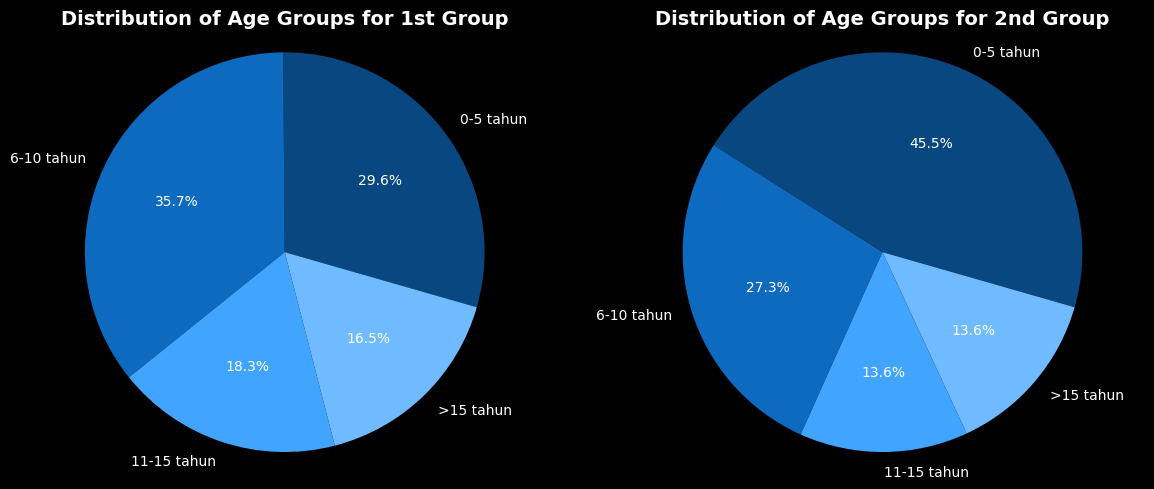

In [215]:
fig, axes = plt.subplots(figsize=(12,5), ncols=2)
plt.style.use('dark_background')

groups = age_group_table['Group'].unique()
colors = ['#094780','#0D6ABF','#41A4FF','#70BBFF']
for i in range(len(groups)):
  df_group = age_group_table[age_group_table['Group'] == groups[i]]
  labels = df_group['Age Group']
  sizes = df_group['Total Store']
  axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=-16, colors=colors)
  axes[i].set_title(f'Distribution of Age Groups for {groups[i]}', fontsize=14, fontweight='bold')
  axes[i].axis('equal')
plt.tight_layout()
plt.show()

In [216]:
market_size_table = df_new.groupby(['Group', 'Market Size'])['Market Size'].count().rename('Total Store').reset_index()
market_size_table

,Group,Market Size,Total Store
0,1st Group,Large,20
1,1st Group,Medium,80
2,1st Group,Small,15
3,2nd Group,Large,22


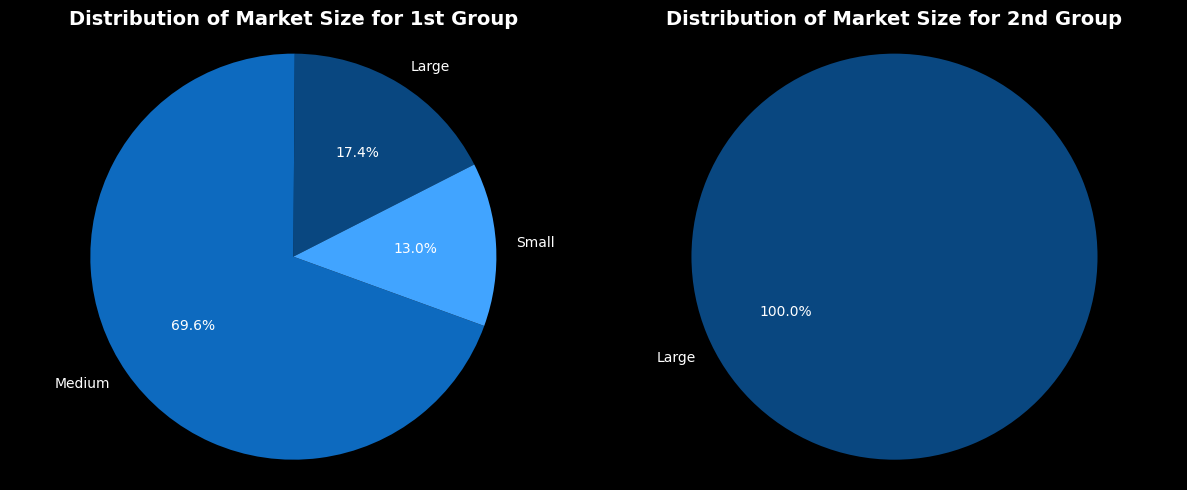

In [217]:
fig, axes = plt.subplots(figsize=(12,5), ncols=2)
plt.style.use('dark_background')

groups = market_size_table['Group'].unique()
colors = ['#094780','#0D6ABF','#41A4FF']
for i in range(len(groups)):
  df_group = market_size_table[market_size_table['Group'] == groups[i]]
  labels = df_group['Market Size']
  sizes = df_group['Total Store']
  axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=27, colors=colors)
  axes[i].set_title(f'Distribution of Market Size for {groups[i]}', fontsize=14, fontweight='bold')
  axes[i].axis('equal')
plt.tight_layout()
plt.show()

In [218]:
promo_type_table = df_new.groupby(['Group', 'Promotion'])['Promotion'].count().rename('Total Store').reset_index()
promo_type_table

,Group,Promotion,Total Store
0,1st Group,1,36
1,1st Group,2,41
2,1st Group,3,38
3,2nd Group,1,7
4,2nd Group,2,6
5,2nd Group,3,9


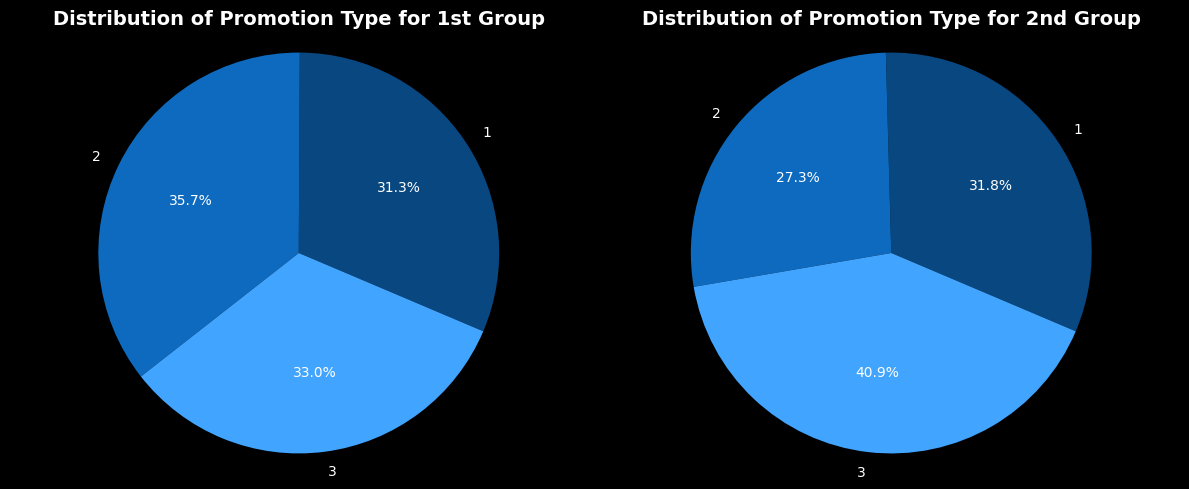

In [219]:
fig, axes = plt.subplots(figsize=(12,5), ncols=2)
plt.style.use('dark_background')

groups = promo_type_table['Group'].unique()
colors = ['#094780','#0D6ABF','#41A4FF']
for i in range(len(groups)):
  df_group = promo_type_table[promo_type_table['Group'] == groups[i]]
  labels = df_group['Promotion']
  sizes = df_group['Total Store']
  axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=-23, colors=colors)
  axes[i].set_title(f'Distribution of Promotion Type for {groups[i]}', fontsize=14, fontweight='bold')
  axes[i].axis('equal')
plt.tight_layout()
plt.show()

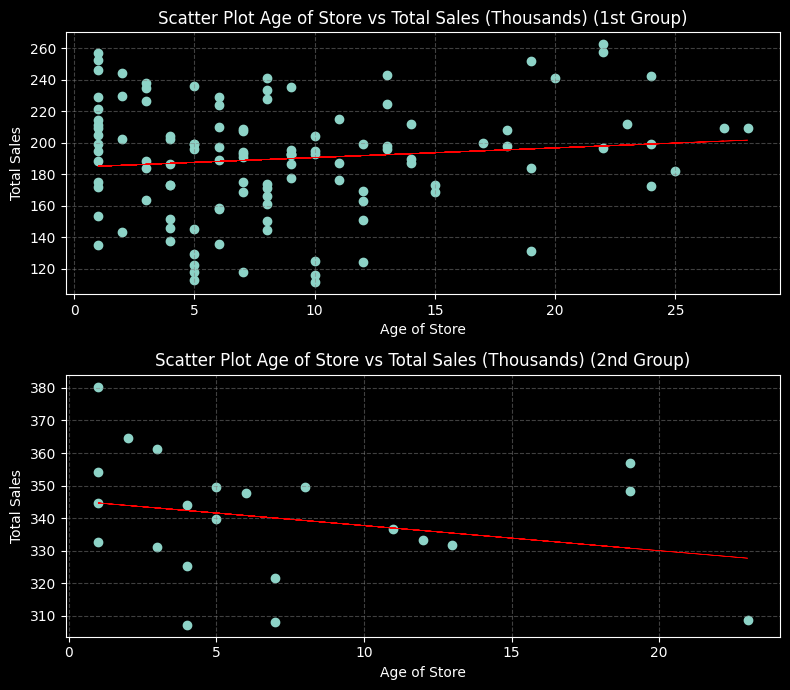

In [220]:
# Table of age of store vs total sales
df_new_1st_group = df_new[df_new['Group'] == '1st Group']
df_new_2nd_group = df_new[df_new['Group'] == '2nd Group']

# Scatter plot age vs total sales
fig, axes = plt.subplots(figsize=(8,7), nrows=2)
plt.style.use('dark_background')

# Scatter 1 (1st Group)
axes[0].scatter(df_new_1st_group['Age of Store'], df_new_1st_group['Sales (Thousands)'])
axes[0].set_title('Scatter Plot Age of Store vs Total Sales (Thousands) (1st Group)')
axes[0].set_xlabel('Age of Store')
axes[0].set_ylabel('Total Sales')
axes[0].grid(color='gray', linestyle='--', alpha=0.5)
z = np.polyfit(df_new_1st_group['Age of Store'], df_new_1st_group['Sales (Thousands)'], 1)
p = np.poly1d(z)
axes[0].plot(df_new_1st_group['Age of Store'], p(df_new_1st_group['Age of Store']), "r-", linewidth=0.5)

# Scatter 2 (2nd Group)
axes[1].scatter(df_new_2nd_group['Age of Store'], df_new_2nd_group['Sales (Thousands)'])
axes[1].set_title('Scatter Plot Age of Store vs Total Sales (Thousands) (2nd Group)')
axes[1].set_xlabel('Age of Store')
axes[1].set_ylabel('Total Sales')
axes[1].grid(color='gray', linestyle='--', alpha=0.5)
z = np.polyfit(df_new_2nd_group['Age of Store'], df_new_2nd_group['Sales (Thousands)'], 1)
p = np.poly1d(z)
axes[1].plot(df_new_2nd_group['Age of Store'], p(df_new_2nd_group['Age of Store']), "r-", linewidth=0.5)

plt.tight_layout()
plt.show()

---

                                                                              
                                                                               
                                                                     THE END

---

